In [ ]:
# Generate the synthetic dataset

import csv
import random
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from eli5.sklearn import PermutationImportance

import eli5

from matplotlib import pyplot as plt
from pdpbox import pdp, info_plots


# List of teams to simulate
teams = ["Brazil", "Argentina", "France", "Italy", "Germany", "Spain", "Portugal", "Netherlands", "Belgium", "England", "Uruguay", 
         "Nigeria", "Sweden", "Denmark", "Croatia", "Poland", "Hungary", "Japan", "Iran", "South Korea", "Mexico", "Egypt"]

# Man of the Match selection from players
# man_of_the_match_players = ["Neymar", "Mbappé", "Sane", "Pedri", "Bruno Fernandes", "Frenkie de Jong", "Messi", "Kevin de Bruyne", "João Félix", "Manuel Neuer"]

# Function to generate a random date starting from Oct 1, 2024
def generate_random_date(start_date):
    return start_date + timedelta(days=random.randint(0, 30))  # random within the month

# Function to generate match data
def generate_match_data():
    date = generate_random_date(datetime(2024, 10, 1))  # Start from Oct 1, 2024
    team = random.choice(teams)
    opponent = random.choice([t for t in teams if t != team])
    
    goal_scored = random.randint(0, 6)
    ball_possession = random.randint(25, 75)
    attempts = random.randint(3, 26)
    on_target = random.randint(0, 12)
    off_target = random.randint(1, 11)
    blocked = random.randint(0, 10)
    corners = random.randint(0, 11)
    offsides = random.randint(0, 5)
    free_kicks = random.randint(5, 26)
    saves = random.randint(0, ((goal_scored + attempts) - 1))
    pass_accuracy = random.randint(67, 94)
    passes = random.randint(180, 1200)
    distance_covered = round(random.uniform(80, 150), 1)  # in kms
    fouls_committed = random.randint(5, 25)
    yellow_card = random.randint(0, 6)
    yellow_red = random.randint(0, 1)
    red_card = random.randint(0, 1) if yellow_red != 1 else 0
    man_of_the_match = random.choice(["Yes", "No"])
    first_goal = random.randint(1, 45)
    # Random time for first goal (if any)
    round_stage = random.choice(["Group Stage", "Quarter-finals", "Semi-finals", "Final"])
    pso = random.choice(["Yes", "No"])
    goals_in_pso = random.randint(0, 5) if pso == "Yes" else 0
    own_goals = random.randint(0, 2)
    own_goal_time = random.randint(0, 90) if own_goals else 0

    return [
        date.strftime("%d-%m-%Y"), team, opponent, goal_scored, ball_possession, attempts, on_target,
        off_target, blocked, corners, offsides, free_kicks, saves, pass_accuracy, passes,
        distance_covered, fouls_committed, yellow_card, yellow_red, red_card, man_of_the_match,
        first_goal, round_stage, pso, goals_in_pso, own_goals, own_goal_time
    ]

# Define the CSV file name
filename = "football_match_stats.csv"

# Define the headers
headers = [
    "Date", "Team", "Opponent", "Goal Scored", "Ball Possession %", "Attempts", "On-Target", "Off-Target",
    "Blocked", "Corners", "Offsides", "Free Kicks", "Saves", "Pass Accuracy %", "Passes", "Distance Covered (Kms)",
    "Fouls Committed", "Yellow Card", "Yellow Red", "Red Card", "Man of the Match", "1st Goal", "Round", "PSO",
    "Goals in PSO", "Own Goals", "Own Goal Time"
]

# Open the CSV file and write the headers and data rows
with open(filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(headers)
    
    # Generate 200 rows of match data
    for _ in range(200):
        match_data = generate_match_data()
        writer.writerow(match_data)

#print(f"CSV file '{filename}' has been created with 200 rows of football match data.")



In [1]:
# Read the datset
## I am reading the datset that I had generated earlier to keep the results consistent with the article. You can generate using the code above or use the dataset that has already been generated

import pandas as pd
import numpy as np
data = pd.read_csv('football_match_stats_gen.csv')

# Creating the dependent variable

y = (data['Man of the Match'] == 'Yes')

# Train the decision tree model

feature_names = [i for i in data.columns if data[i].dtype in [np.float64] or data[i].dtype in [np.int64]]
x = data[feature_names]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=1)
dt_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x,train_y)
pred_y = dt_model.predict(test_x)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y,pred_y)
print(cm)
accuracy_score(test_y,pred_y)


[[13 14]
 [12 11]]


0.48

In [3]:

#Train the random forest model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1).fit(train_x,train_y)
pred_y = rf_model.predict(test_x)
cm = confusion_matrix(test_y,pred_y)
print(cm)
accuracy_score(test_y,pred_y)

[[13 14]
 [11 12]]


0.5

In [7]:
#Which features are impacting the model

from eli5.sklearn import PermutationImportance

#Impactful/Influential variables for Decision tree model

perm = PermutationImportance(dt_model, random_state=1).fit(test_x,test_y)
import eli5

eli5.show_weights(perm, feature_names = test_x.columns.tolist())



Weight,Feature
0.0440 ± 0.0688,1st Goal
0.0160 ± 0.0160,Distance Covered (Kms)
0.0040 ± 0.0160,Blocked
0.0040 ± 0.0688,Yellow Card
0 ± 0.0000,Goal Scored
0 ± 0.0000,Red Card
0 ± 0.0000,Yellow Red
0 ± 0.0000,Own Goals
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Offsides


In [9]:
#Impactful/Influential variables for Random forest model

perm = PermutationImportance(rf_model, random_state=1).fit(test_x,test_y)

eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0520 ± 0.0599,Ball Possession %
0.0520 ± 0.0408,Free Kicks
0.0480 ± 0.0408,Yellow Card
0.0440 ± 0.0299,Own Goals
0.0400 ± 0.0253,Saves
0.0360 ± 0.0466,Goal Scored
0.0320 ± 0.0599,Distance Covered (Kms)
0.0240 ± 0.0466,Passes
0.0160 ± 0.0392,1st Goal
0.0120 ± 0.0599,Corners


['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow Red', 'Red Card', '1st Goal', 'Goals in PSO', 'Own Goals', 'Own Goal Time']
obtain pred_func from the provided model.


  0%|          | 0/7 [00:00<?, ?it/s]

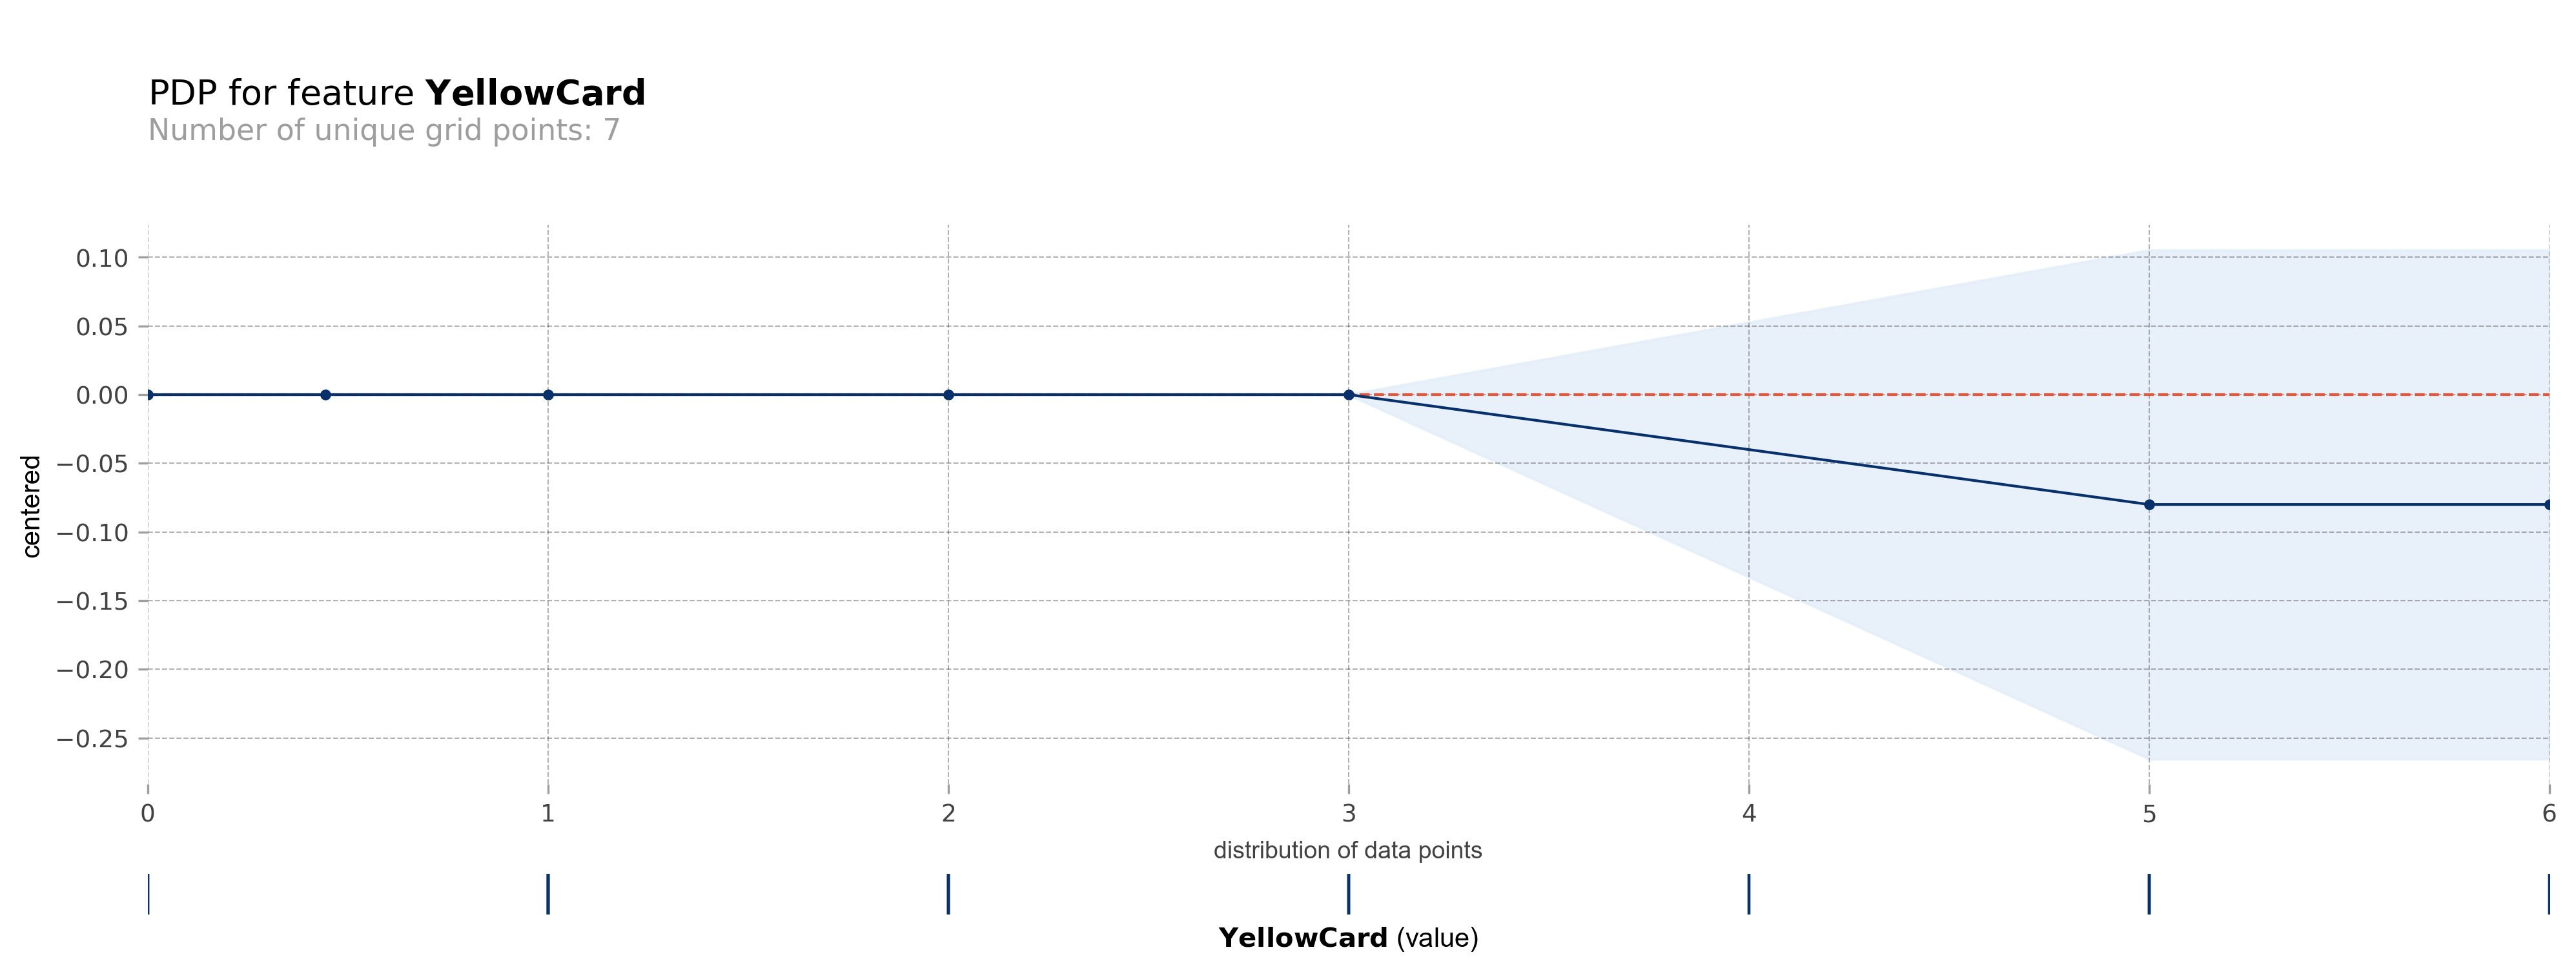

In [11]:
#PDP Plot for Decision Tree model

from matplotlib import pyplot as plt
from pdpbox import pdp, info_plots

feature_to_plot = 'Yellow Card'
features_input = test_x.columns.tolist()
print(features_input)

pdp_yl = pdp.PDPIsolate(model=dt_model,df=test_x,
                           model_features=features_input,
                           feature=feature_to_plot, feature_name=feature_to_plot)

fig, axes = pdp_yl.plot(center=True, plot_lines=False, plot_pts_dist=True, 
                          to_bins=False, engine='matplotlib')
fig.set_figheight(6)



obtain pred_func from the provided model.


  0%|          | 0/7 [00:00<?, ?it/s]

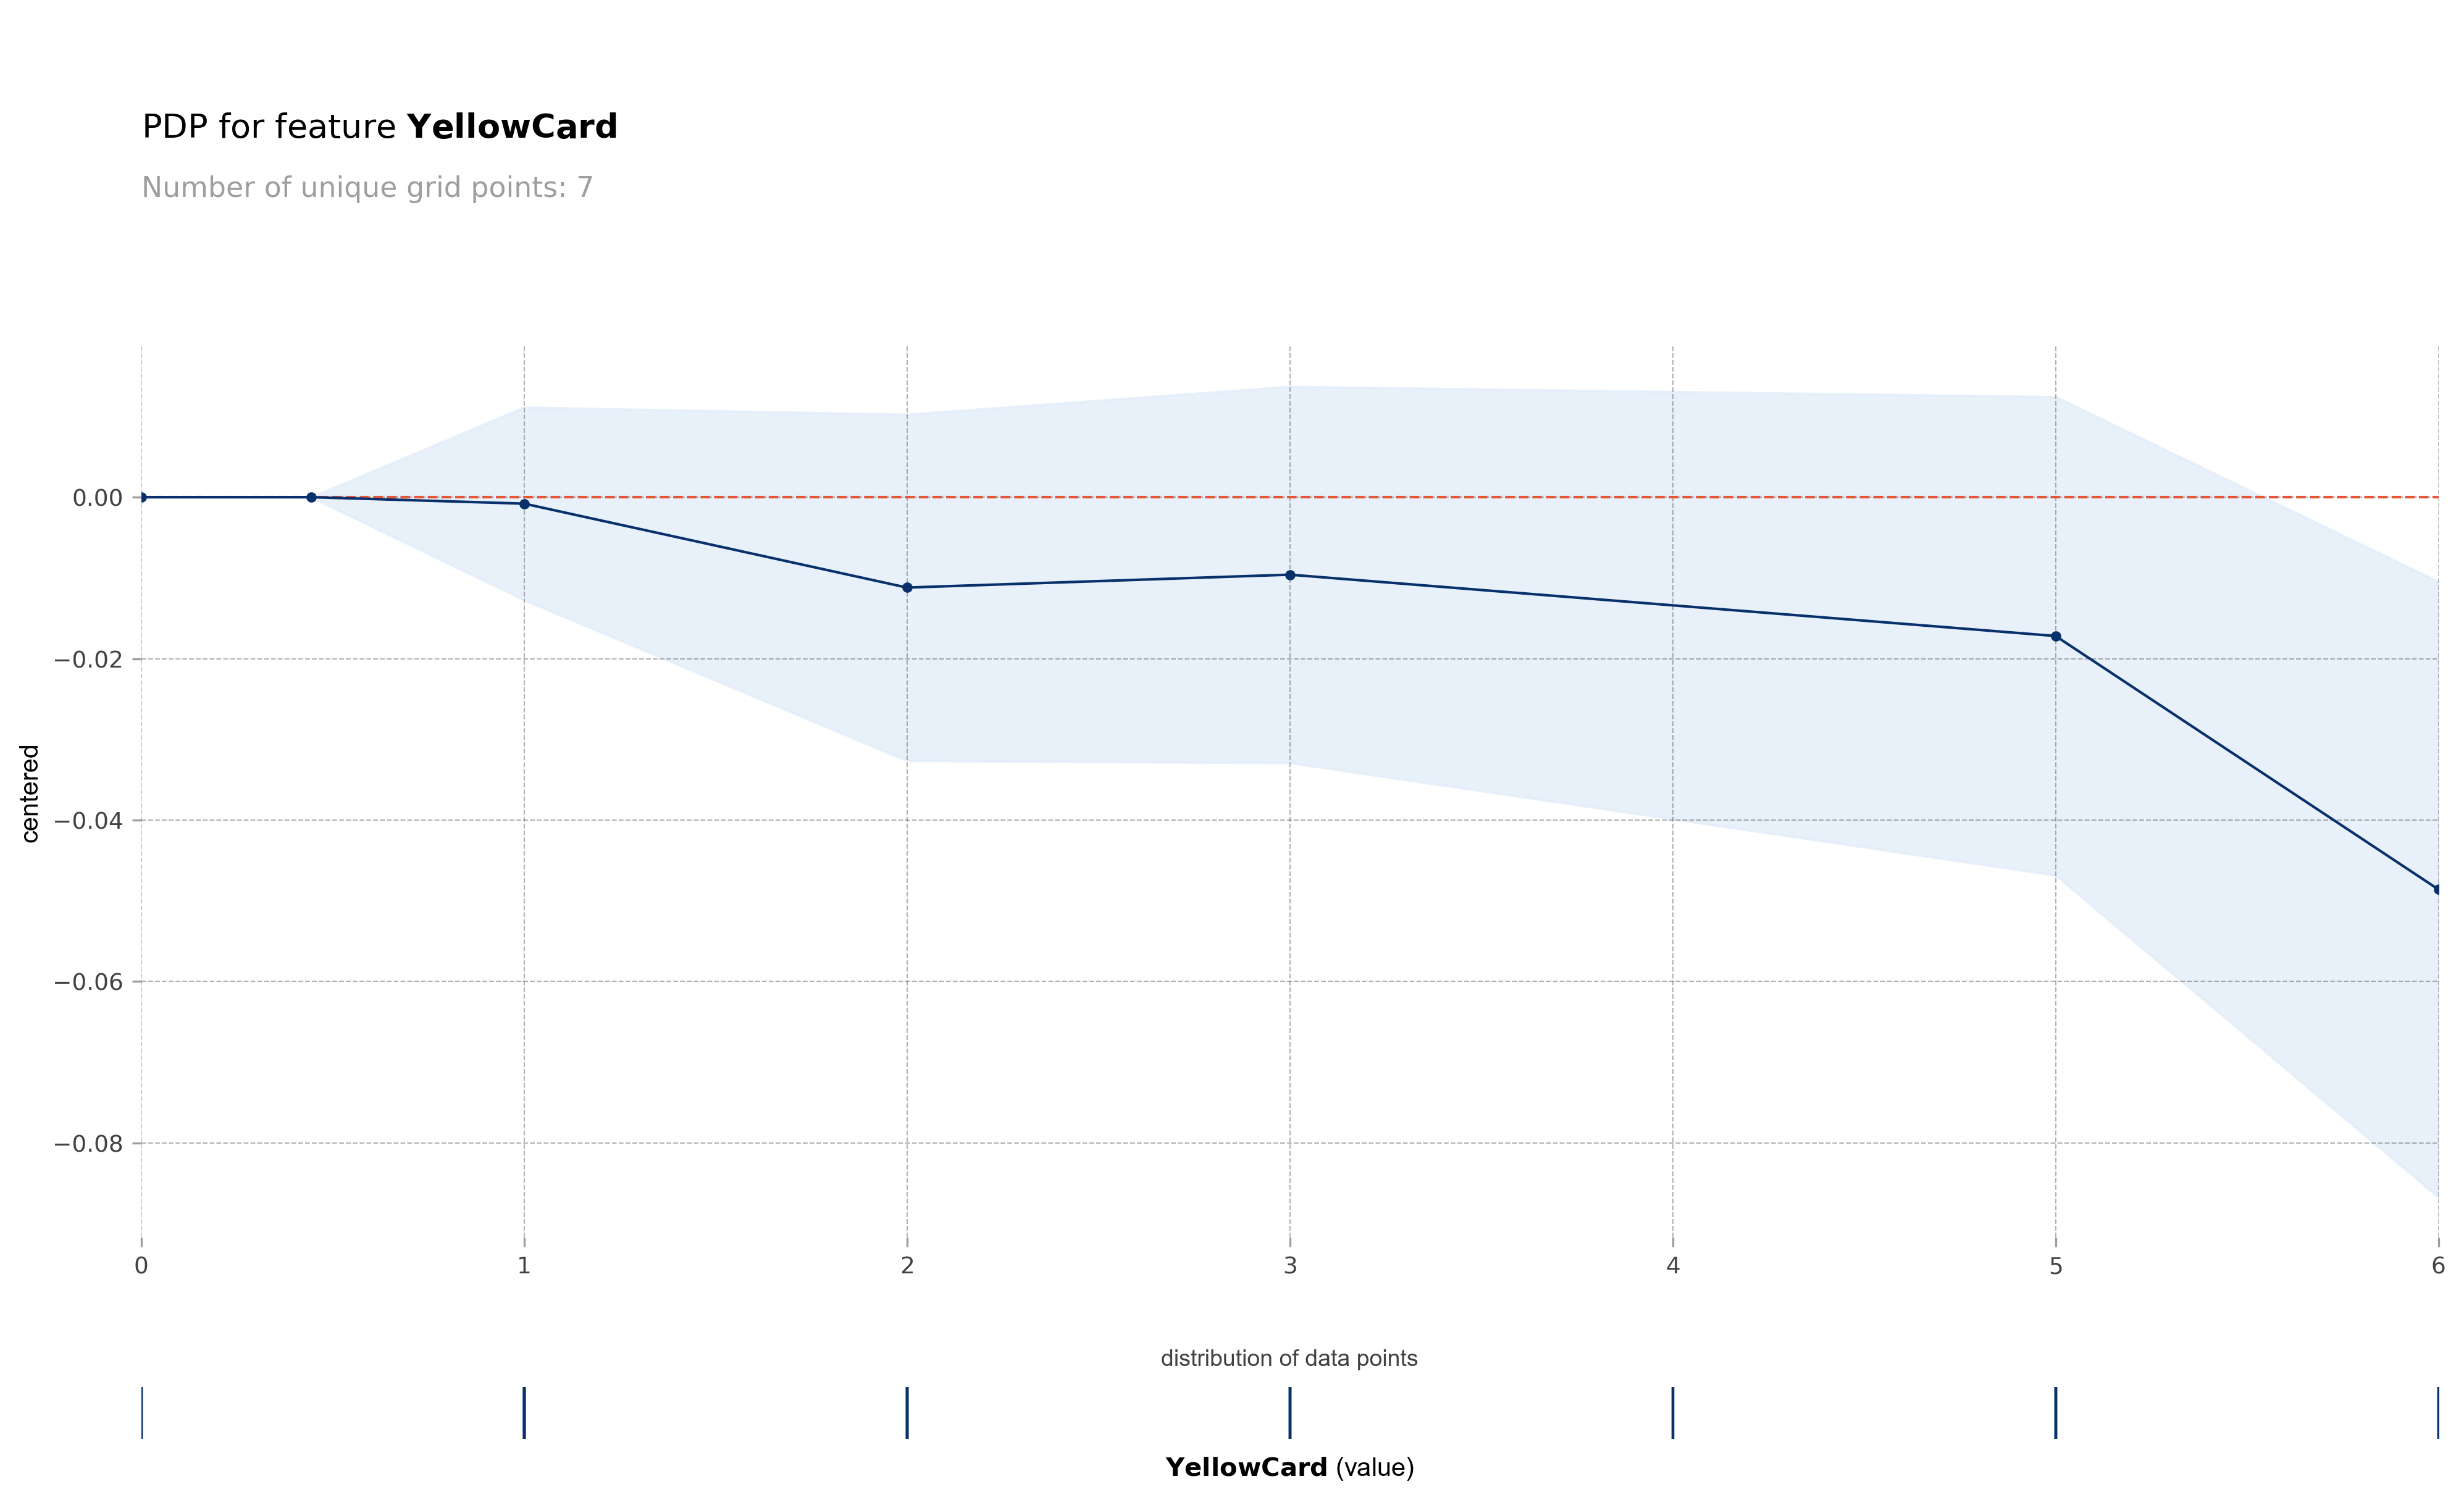

In [13]:
#PDP Plot for Random Forest model

pdp_yl = pdp.PDPIsolate(model=rf_model,df=test_x,
                           model_features=features_input,
                           feature=feature_to_plot, feature_name=feature_to_plot)
print(pdp_yl)

fig, axes = pdp_yl.plot(center=True,plot_lines=False, plot_pts_dist=True, engine='matplotlib')
fig.set_figheight(10)
